# Biblioteka Numpy

## Wstęp

Instalacja biblioteki

Na [oficjalnej stronie](https://numpy.org/) biblioteki numpy możemy znaleźć [instrukcje instalacji](https://numpy.org/install/). Chociaż istnieje więcej możliwości twórcy numpy zalecają tylko dwa sposoby instalacji:
* za pomocą menadżera pakietów pythona **conda** $\Rightarrow$ `conda install numpy`
* za pomocą menadżera pakietów pythona **pip** $\Rightarrow$ `pip install numpy`

Importowanie biblioteki

In [ ]:
import numpy as np

print(np.__version__)

Numpy (ang. **Num**erical **py**thon) - pythonowa biblioteka do obliczeń numerycznych. Jest jedną z najczęściej wykorzystywanych bibliotek w Pythonie. Ze względu na bardzo wysoką wydajność obliczeniową (czyli szybkość obliczeń) korzysta z niej wiele innych popularnych bibliotek w pythonie takich jak: scikit-learn, scipy, seaborn, matplotlib, pandas, tensorflow, openCV, ...

Biblioteka numpy posiada wiele funkcji.

In [ ]:
print(dir(np))

Podstawową klasą używaną w numpy jest `ndarray` (*ang. n-dimensional array*).

In [ ]:
print(np.ndarray)

Obiekty klasy `ndarray` nazywane są potocznie tablicami numpy (*ang. numpy array*) lub po prostu tablicami (*ang. array*). 

Twórcy numpy nie zalecają bezpośredniego inicjalizowania obiektów klasy `ndarray`. Zamiast tego udostęniają rodzinę funkcji fabrykujących (takich tak `np.array`, `np.zeros`, ...), które odpowiadają za tworzenie obiektów klasy `ndarray`. Na początku popatrzmy na funkcję `np.array`.

In [ ]:
# Obiekty klasy ndarray (czyli tablice numpy) możemy tworzyć za pomocą funkcji np.array

n1 = np.array([1, 2, 3, 4, 5])  # funkcja jako parametr przyjmuje najczęściej listę (ale możemy przekazywać też różne 
# innych typy- o tym później), a zwraca zainicjalizowany obiekt klasy ndarray o wartości odpowiadającej wartości 
# przekazanej listy.

print(type(n1))
print(n1)

A co potrafią obiekty klasy `ndarray` ?

In [ ]:
print(dir(np.ndarray))

Wśród dostępnych atrybutów mamy, np. kształt. 

In [ ]:
print(n1.shape)

O pozostałych polach tablicy numpy powiemy sobie za chwilę.

Na tablicach numpy działa wiele funkcji biblioteki numpy, np. funkcja `np.shape`.

In [ ]:
print(np.shape(n1))

Zanim zaczniemy poznawać szczegóły biblioteki numpy, zastanówmy się po co jej w ogóle używać. Czy nie wystarczą nam listy pythonowe? Przecież to co zrobiliśmy powyżej możemy równie dobrze zrobić za pomocą zwykłych list.

In [ ]:
l1 = [1, 2, 3, 4, 5]

print(l1)
print(len(l1))  # shape

### Listy vs ndarray

Jest kilka powodów, dla których moglibyśmy chcieć użyć `ndarray` zamiast list:
    
1. obiekty klasy ndarray potrafią znacznie więcej rzeczy niż zwykłe pythonowe listy 
2. ndarray są znacznie szybsze od list

Wyświetlając zawartość biblioteki numpy oraz atrybuty obiektu ndarray zobaczyliśmy, że punkt 1 jest prawdziwy. Spójrzmy jeszcze na konretny przykład. 

Dodawania 'po współrzędnych' (*ang. element-wise addition*) to dodawanie do siebie dwóch kolekcji poprzez dodawanie do siebie takich elementów tych dwóch kolekcji, które znajdują się na odpowiadających sobie pozycjach:


#### <center>$[ 1, 2, 3, 4, 5] + [6, 7, 8, 9,10] = [1+6, 2+7, 3+8, 4+9, 5+10] = [7, 9, 11, 13, 15]$</center>

Jak zrobilibyśmy to za pomocą zwykłych list?

In [ ]:
l1 = [1, 2, 3, 4, 5]
l2 = [6, 7, 8 , 9, 10]

Operator `+` na listach jest operatorem konkatencji, więc użycie go tutaj nic nam nie pomoże.

In [ ]:
result = l1 + l2
print(result)

Używając list jesteśmy zmuszeni takie dodawanie po współrzędnych zaimplementować samodzielnie.

In [ ]:
result = []

for item1, item2 in zip(l1, l2):
    result.append(item1 + item2)
    
print(result)

W odróżnieniu od list, operator `+` w działaniu na tablicach numpy pełni rolę właśnie operatora dodawania po współrzędnych.

In [ ]:
n1 = np.array(l1)
n2 = np.array(l2)

result = n1+n2
print(result)

Ale wobec tego, co gdybyśmy chcieli 'skonkatenować' ze sobą dwie tablice numpy? 

Należy użyć funkcji `np.concatenate`.

In [ ]:
result = np.concatenate([l1, l2])
print(result)

Podsumowując, tablice numpy umieją robić znacznie więcej rzeczy niż pythonowe listy. A jak jest z tą wydajnością obliczeniową?

### Benchmarking (analiza porównawcza)

Dodamy teraz do siebie dwie 1000-elementowe listy pythonowe oraz dwie 1000-elementowe tablice numpy i porównamy czas, potrzebny na wykonanie tych operacji.

Do porównywania czasu wykonywania fragmentów kodu w pythonie najczęściej wykorzystuje się znajdującą się w standardowej bibliotece pythona, bibliotekę `timeit`.

In [ ]:
import timeit

In [ ]:
setup_code = """
result = []
l1 = range(1100, 2100)
l2 = range(500, 1500)
"""

code = """
for item1, item2 in zip(l1, l2):
    result.append(item1+item2)
"""

t = timeit.timeit(code, setup=setup_code, number=1000)  # default number = 1.000.000
print(t)

Ten sam kod możemy uruchomić jeszcze w inny sposób, za pomocą dostępnej z poziomu Jupyter-a magicznej komendy `timeit`

In [ ]:
l1 = range(1100, 2100)
l2 = range(500, 1500)
result = []

In [ ]:
%%timeit  # magiczna komenda

for item1, item2 in zip(l1, l2):
    result.append(item1+item2)
    
# widzimy, że komenda została wykonana 1000 razy, a wynik uśredniony. Magiczna komenda timeit w zależności od tego 
# ile zajmuje wykonanie komendy, wykonuje ją mniej lub więcej razy. Liczbę powtórzeń dobiera dynamicznie na podstawie 
# czasu trwania pierwszych iteracji.

A jak to będzie wyglądało z wykorzystaniem tablic numpy?

In [ ]:
n1 = np.array(l1)
n2 = np.array(l2)

In [ ]:
%%timeit

result = n1 + n2

Widzimy, że z użyciem tablic numpy kod wykonał się około 100 razy szybciej. To jest ogromna różnica. 

Wyobraźmy sobie, że użytkownik musi czekać 0.5 sekundy na odpowiedź. Raczej tego nie zauważy. 50 sekund już raczej boleśnie odczuje. A wraz ze wzrostem wielkości zbioru danych ta różnica będzie się jeszcze powiększała.

##### Co powoduje, że tablice numpy są znacznie szybsze od list pythona (informacje uzupełniające) ?

Wysoka wydajność obliczeniowa tablic numpy wynika ze sposobu ich implementacji. Tablice numpy implementują strukturę danych nazywaną tablicą lub wektorem (*ang. array aka vector*), czyli ciągły blok pamięci (*ang. contiguous block of memory*) zawierający elementy jednego typu. Listy pythonowe implementują tzw. dynamiczną tablicę (*ang. dynamic array*) zawierającą wskaźniki.

W skrócie możemy wymienić cztery podstawowe cechy, dzięki którym tablice numpy są szybkie:
* elementami tablic numpy są proste typy (int16, float32, ...), w listach są to obiekty (int, float, ...)
* elementy tablicy numpy mają ten sam typ, listy mogą mieć elementy różnych typów
* tablice numpy przechowują swoje elementy jeden obok drugiego w ciągłym bloku pamięci (ang. contingous block of memory), a listy pythonowe przechowują wskaźniki do fragmentu pamięci, w którym zapisany jest dany element listy
* funkcje i metody działające na tablicach numpy są zaimplementowane w języku C z wykorzystaniem najszybszych znanych algorytmów i w związku z tym będą znacznie szybsze niż ich odpowiedniki napisane przez nas z wykorzystaniem wysokopoziomych struktur takich jak listy, warunki i pętle

Więcej o tablicach numpy można przeczytać [tutaj](https://numpy.org/devdocs/user/whatisnumpy.html)

Biblioteka numpy swoją popularność zawdzięcza właśnie tablicom numpy. W związaku z tym poznajmy je lepiej.

---

## Tworzenie tablic numpy

Jak już wcześniej powiedzieliśmy, twórcy numpy nie zalecają bezpośredniego inicjalizowania tablic numpy i proponują ponad 40 funkcji do ich tworzenia. Nie będziemy oczywiście wszystkich omawiać. Listę wszystkich funkcji można znaleźć [tutaj](https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation)

Wyróżnia się 6 podstawowych mechanizmów tworzenia tablicy numpy. Każdą z tych 40 funkcji można przyporządkować do jednego z tych mechanizmów:
1. funkcje tworzące tablicę numpy poprzez zrzutowanie na ndarray pythonowych struktur podstawowych takich jak lista lub krotka
2. funkcje tworzące tabclię numpy na podstawie zadanej wartości lub kształtu, takie jak arange, ones, fill
3. funkcje tworzące tablicę numpy poprzez modyfikacje już istniejących tablic numpy
4. funkcje tworzące tablicę numpy na podstawie danych załadowanych z zasobów zewnętrznych (pliku, api, bazy)
5. funkcje tworzące tablicę numpy z danych binarnych (poprzez użycie stringów lub bufferów)
6. funkcje specjalne (czyli takie, które nie zaliczają się do żadnej z powyższych grup)

### 1. Funkcje tworzące tablicę numpy na podstawie podstawowej sekwencji pythonowej

#### Funkcja [`np.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)

In [ ]:
# na podstawie listy powstanie jedno-wymiarowa tablica numpy (1-D ndarray)
array_1d = np.array([1, 2, 3, 4])
array_1d

In [ ]:
# na podstawie zagnieżdżonej listy powstanie dwu-wymiarowa tablica numpy (2-D ndarray)
array_2d = np.array([[1., 2., 3.], [4., 5., 6.]])
array_2d

In [ ]:
# dalsze zagnieżdżanie spowoduje zwiększanie wymiarowości tablicy. 
# Poniżej przykład trój-wymiarowej tablicy numpy (3-D ndarray)
array_3d = np.array(
    [
        [
            [1, 2], 
            [3, 4],
            [5, 6]
        ], 
        [
            [7, 8], 
            [9, 10], 
            [11, 12], 
        ],
        [
            [13, 14], 
            [15, 16], 
            [17, 18], 
        ],
        [
            [19, 20], 
            [21, 22], 
            [23, 24], 
        ],
    ]
)

array_3d

Co możemy powiedzieć o takiej tablicy?

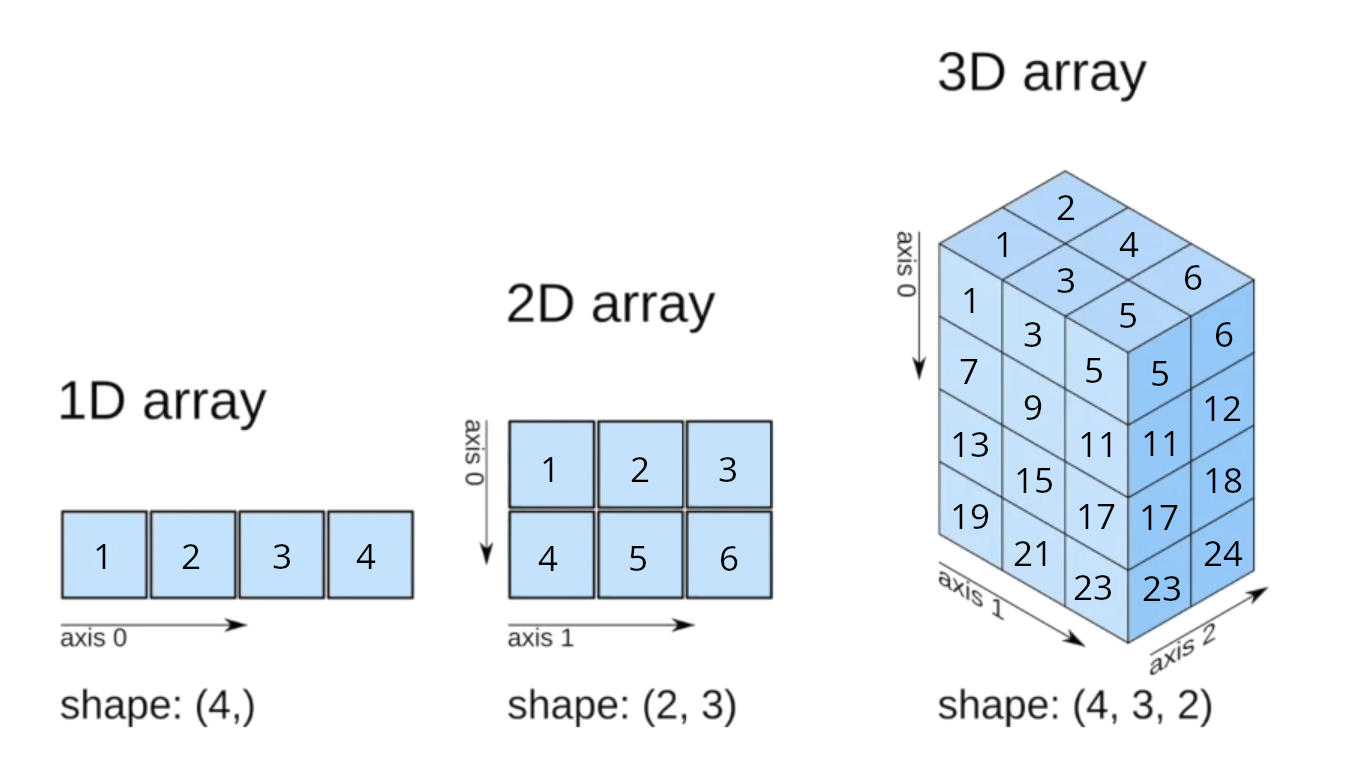

Na powyższej ilustracji warto zwrócić uwagę na orientacje osi poszczególnych tablic.

#### Zadanie 1.

---

Utwórz niżej opisane tablice numpy. Wartości możesz wpisać ręcznie.

- wektor zawierający 6 kolejnych liczb ciągu Fibonacciego 
- macierz 3x3 zawierającą 9 kolejnych potęg liczby 2 (zaczynając od wykładnika = 0)
- tensor 2x3x3 zawierający kolejne liczby całkowite (zaczynając od 1)

In [ ]:
# rozwiązanie

### Podstawowe właściwości obiektów klasy ndarray

Do podstawowych właściwości tablicy numpy możemy zaliczyć:

* wymiar tablicy
* kształt tablicy
* typ tablicy
* rozmiar tablicy
* ilośc pamięci zajmowana przez pojedynczego element tablicy

#### Wymiar tablicy *(ndim)*

Wymiarem tablicy nazywamy najgłębszy poziom zagnieżdżenia jej elementów. 

$2$ - wymiar 0

$[2,2,2]$ - wymiar 1

$[[2,2,2], [2,2,2]]$ - wymiar 2


In [ ]:
# wymiar tablicy

# sposób I (za pomocą atrybutu ndim obiektu klasy ndarray)
array_3d_dim = array_3d.ndim
print(array_3d_dim)

# sposób II (za pomocą funkcji ndim biblioteki numpy)
array_3d_dim = np.ndim(array_3d)
print(array_3d_dim)

Wymiar tablicy możemy również utożsamić z liczbą osi potrzebnych do opisania jego kształtu.

#### Kształt tablicy *(shape)*

Kształtem tablicy nazywamy zestaw liczb opisujący liczbę elementów na poszczególnych osiach tablicy (tzw. długość osi)

In [ ]:
# kształt tablicy

# wersja I (atrybut shape klasy ndarray)
array_3d_shape = array_3d.shape
print(array_3d_shape)

# wersja II (funkcja shape biblioteki numpy)
array_3d_shape = np.shape(array_3d)
print(array_3d_shape)

#### Typ tablicy *(dtype)*

Typem tablicy nazywamy typ elementów zawartych w tej tablicy. Tablica numpy nie może posiadać wartości różnych typów.

In [ ]:
# typ tablicy

# sposób I (atrybut dtype klasy ndarray)
array_3d_type = array_3d.dtype
print(array_3d_type)

array_2d_type = array_2d.dtype
print(array_2d_type)

Numpy posiada 19 wbudowyanych typów danych

| Typ        | Opis                       |
| --------------------- |:---------------------------|
| bool_   | domyślny typ reprezentujący wartość logiczną prawda lub fałsz o rozmiarze 1 bajta |
| int_   | domyślny typ reprezentujący wartość całkowitoliczbową. Identyczny z typem long w C (32 lub 64-bitowy) |
| intc | typ podobny do int w C (32 lub 64-bitowy) |
| intp | typ reprezentujacy wartość całkowitoliczbową używany do indeksowania |
| int8 | typ reprezentujący 8-bitową (jeden bajt) wartość całkowitoliczbową. Zakres wartości od -128 do 127 |
| int16 | typ reprezentujący wartość 16-bitową (dwa bajty) wartość całkowitoliczbową. Zakres wartości od -32768 do 32767 |
| int32 | typ reprezentujący wartość 32-bitową (cztery bajty) wartość całkowitoliczbową. Zakres wartości od -2147483648 to2147483647 |
| int64 | typ reprezentujący wartość 64-bitową (osiem bajtów) wartość całkowitoliczbową. Zakres wartości od -9223372036854775808 do 9223372036854775807 |
| uint8 | typ reprezentujący 8-bitową (jeden bajt) wartość całkowitoliczbową bez znaku |
| uint16 | typ reprezentujący 16-bitową (dwa bajty) wartość całkowitoliczbową bez znaku |
| uint32 | typ reprezentujący 32-bitową (cztery bajty) całkowitoliczbową bez znaku |
| uint64 | typ reprezentujący 64-bitową (osiem bajtów) wartość całkowitoliczbową bez znaku |
| float_ | domyślny typ reprezentujący wartość zmiennoprzecinkową. Typ identyczny do float64 |
| float16 | typ reprezentujący wartość zmiennoprzecinkową połówkowej precyzji. 5-bitowy wykładnik, 10-bitowa mantysa + bit znaku |
| float32 | typ reprezentujący wartość zmiennoprzecinkową pojedynczej precyzji. 8-bitowy wykładnik, 23-bitowa mantysa + bit znaku |
| float64 | typ reprezentujący wartość zmiennoprzecinkową podwójnej precyzji. 11-bitowy wykładnik, 52-bitowa mantysa + bit znaku |
| complex_ | domyślny typ reprezentujący wartość zespoloną. Typ identyczny z complex 128 |
| complex64 | typ reprezentujący wartość zespoloną. 32-bitowa część rzeczywista + 32-bitowa część urojona |
| complex128 | typ reprezentujący wartość zespoloną. 64-bitowa część rzeczywista + 64-bitowa część urojona |

Zakresy poszczególnych typów danych możemy łatwo sprawdzić za pomocą funkcji `np.iinfo`, `np.finfo`.

In [ ]:
print(np.iinfo(np.int32))

In [ ]:
print(np.finfo(np.float32))

In [ ]:
print(np.iinfo(np.int8))

A co jeżeli przekroczymy dopuszczalny zakres?

In [ ]:
res = np.array([128], dtype=np.int8)

Dostaniemy **Warning (ale nie błąd!)** o przekroczeniu zakresu (overflow). w numpy efektem będzie **obcięcie** (truncate) wartości do dostępnej liczby bitów (wartość będzie zachowywała sie tak jakby obowiązywała ją arytmetka modulo)

In [ ]:
print(res)

In [ ]:
print(np.array([129], dtype=np.int8))

In [ ]:
print(np.array([999999], dtype=np.int8))

#### Rozmiar tablicy *(size)*

Rozmiarem tablicy nazywamy liczbę jej elementów.

In [ ]:
# rozmiar tablicy

# sposób I (atrybut size klasy ndarray)
array_3d_size = array_3d.size
print(array_3d_size)

# sposób II (funkcja size biblioteki numpy)
array_3d_size = np.size(array_3d)
print(array_3d_size)

#### Ilośc pamięci zajmowana przez pojedynczy element tablicy *(itemsize)*

Ilość pamięci zajmowana przez pojedynczy element podawana jest w **bajtach**. 

`1 bajt = 8 bitów`

In [ ]:
# ilośc pamięci zajmowana przez pojedynczy element tablicy

# sposób I (atrybut itemsize klasy ndarray)
array_3d_itemsize = array_3d.itemsize
print(array_3d_itemsize)

In [ ]:
# ilośc pamięci zajmowana przez całą tablicę

# sposób I (atrybut nbytes klasy ndarray)
array_3d_nbytes = array_3d.nbytes
print(array_3d_nbytes)

### Zadanie 2

---

Znajdź ile miejsca w pamięci komputera zajmuje zmienna array_2d. Wykorzystaj rozmiar tablicy oraz ilość miejsca zajmowanego przez jeden element tablicy. Następnie porównaj wynik z wartością przechowywaną w atrybucie nbytes obiektu array_2d.

In [ ]:
# rozwiązanie


### Zadanie 3

---

Porównaj ze sobą typ tablic array_2d i array_3d.

In [ ]:
# rozwiązanie


### Zadanie 4

---

Przedstaw poniższą macierz za pomocą tablicy numpy, a następnie wyświetl informacje o jej wymiarze, rozmiarze, typie oraz kształcie.

<br>
<center>
$
\begin{pmatrix}
2 & 7 & 17 & 29 \\
3 & 11 & 19 & 31 \\
5 & 13 & 23 & 37 \\
\end{pmatrix}
$
</center>

In [ ]:
# rozwiązanie


---

Wróćmy do sposobów tworzenia tablic. Jesteśmy w trakcie poznawania funkcję `np.array`. 

Za pomocą opcjonalnego parametru `dtype` funkcji `np.array` możemy narzucić typ tablicy.

In [ ]:
n1 = np.array(
    [
        [1, 2 ,3],
        [4, 5, 6]
    ]
)  # tablica np.int32

print(n1.dtype)
print(n1)

In [ ]:
n2 = np.array(
    [
        [1., 2., 3.],
        [4., 5., 6.]
    ]
)  # tablica np.float64
print(n2.dtype)
print(n2)

In [ ]:
n3 = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    dtype=np.float32
)  # tablica np.float64
print(n2.dtype)
print(n2)

Popatrzmy teraz na inne mechanizmy tworzenia tablic numpy.

### 2. funkcje tworzące tabclię numpy na podstawie zadanej wartości lub kształtu

#### Funkcja [`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones)

In [ ]:
# Obiekt klasy ndarray składający się wyłącznie z jedynek możemy stworzyć za pomocą funkcji np.ones. 
# Funkcja przyjmuje jeden obowiązkowy, pozycyjny parametr - kształt tworzonej macierzy

n1 = np.ones(shape=3)
print(n1)

print()
n1 = np.ones(shape=(1,3))
print(n1)

print()
n1 = np.ones((3,1))
print(n1)

print()
n1 = np.ones((3,5))
print(n1)

#### Funkcja [`np.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

In [ ]:
# Obiekt klasy ndarray składający się wyłącznie z zer możemy stworzyć za pomocą funkcji np.zeros. 
# Funkcja przyjmuje jeden obowiązkowy, pozycyjny parametr - kształt tworzonej macierzy.

n0 = np.zeros((2,3))

print(n0)

#### Funkcja [`np.full`](https://numpy.org/doc/stable/reference/generated/numpy.full.html)

Obiekty klasy ndarray o zadanym kształcie wypełnione konkretną wartością możemy tworzyć za pomocą funkcji `np.full`. Funkcja przyjmuje dwa obowiązkowy parametry pozycyjne: shape - rozmiar tablicy i fill_value - wartość, którą tablica ma zostać wypełniona.

In [ ]:
n = np.full(shape=3, fill_value=5)
print(n)

In [ ]:
n = np.full((2,5),4)
print(n)

In [ ]:
n = np.full((3,5,2), 2)
print(n)

### Zadanie 5

---

- Utwórz tablicę samych zer o wymiarze 2x5x3
- Utwórz tablicę 1x2x3 której wartościami będą wyłącznie 7

In [ ]:
# rozwiązanie


### Przykłady funkcji generujących jednowymiarowe tablice (aka wektory)

#### Funkcja [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [ ]:
# Obiekt klasy ndarray wygenerowany na podstawie zadanego zakresu możemy stworzyć za pomocą funkcji np.arange. 
# Funkcja przyjmuje jeden, obowiązkowy parametr pozycyjny - stop (koniec zakresu). Na podstawie przekazanego parametru,
# funkcja generuje tablicę liczb od 0 do wartości parametru. Ponadto  Przyjmuje również jeden parametr opcjonalny krok (identycznie jak pythonowa funkcja range)

n = np.arange(10)
print(n)

print()
n = np.arange(stop=5)
print(n)

print()
n = np.arange(start=3, stop=10, step=3)
print(n)

print()
n = np.arange(9, 2, -2)
print(n)

#### Funkcja [`np.linespace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [ ]:
# Obiekt klasy ndarray wygenerowany na podstawie zadanego zakresu możemy również stworzyć za pomocą funkcji np.linespace.
# Funkcja np.linespace różni się od funkcji np.arange tym, że przyjmuj 2 obowiązkowe parametry - start i stop oraz tym, że
# trzeci parametr (num) to nieujemna liczba całkowita przedstawiająca liczbę równoodległych elementów pomiędzy start i stop 
# (a nie długość kroku).

n = np.linspace(start= 0, stop=10)  # domyślna wartość num=50
print(n)

print()
n = np.linspace(1, 5)
print(n)

print()
n = np.linspace(start=3, stop=20, num=3)
print(n)

print()
n = np.linspace(2, 9, 2)
print(n)

### Zadanie 6

---

Utwórz:

- wektor zawierający co trzecią liczbę z przedziału [5, 39)
- wektor zawierający 28 równomiernie rozłożonych wartości z przedziału [20, 40]

In [ ]:
# rozwiązanie


### Przykłady funkcji generujących dwuwymiarowe tablice (aka macierze)

#### Funkcja [`np.eye`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html#numpy.eye)

Macierz diagonalną o wymiarach nxm, możemy stworzyć za pomocą funkcji np.eye. Funkcja przyjmuje jeden, obowiązkowy parametr pozycyjny N - liczba wierszy, oraz dwa opcjonalne parametry pozycyjne M - liczba kolumn (domyślnie równa N),  k - indeks diagonali (domyślnie 0)

In [ ]:
n = np.eye(N=3)
print(n)

In [ ]:
n = np.eye(5)
print(n)

In [ ]:
n = np.eye(3, 5)
print(n)

In [ ]:
n = np. eye(N=3, M=5, k=2)
print(n)

#### Funkcja [`np.indentity`](https://numpy.org/doc/stable/reference/generated/numpy.identity.html#numpy.identity)

Macierz identycznościową możemy stworzyć za pomocą funkcji `np.identity`. Funkcja przyjmuje jeden obowiązkowy parametr pozycyjny n - rozmiar macierzy.

In [ ]:
n = np.identity(4)
print(n)

In [ ]:
n = np.identity(n=2)
print(n)

Wszystkie powyższe funkcje przyjmują parametr opcjonalny `dtype`, który pozwala narzucić typ tablicy.

In [ ]:
n = np.arange(2, 8, 2)
print(n)

In [ ]:
n = np.arange(2, 8, 2, np.float64)
print(n)

In [ ]:
n = np.arange(start=2, stop=8, step=2, dtype=np.float64)
print(n)

Jest dużo więcej sposobów na tworzenie tablic numpy. Opis wszystkich można znaleźć [tutaj](https://numpy.org/doc/stable/user/basics.creation.html) i [tutaj](https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation)

### Zadanie 7

---

- Utwórz macierz jednostkową o wymiarze 4x4

In [ ]:
# rozwiązanie


---

## Podstawowe operacje na tablicach numpy

#### 1-d array

In [ ]:
# Przykładowa 1-wymiarowa tablica numpy 
array_1d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
print(array_1d)

* Indeksowanie

In [ ]:
# Indeksowanie od zera
print(f"Pierwszy element tablicy numpy to {array_1d[0]}")  # pierwszy element ma indeks 0

In [ ]:
# Obsługa ujemnych indeksów
print(f"Ostatni element tablicy numpy to {array_1d[-1]}")

* Wycinki (slice)

In [ ]:
# przedział domknięty z prawej strony i otwarty z lewej (z początkowym indeksem, bez końcowego indeksu)
print(f"Elementy tablicy numpy pomiędzy 2, a 5 indeksem to {array_1d[2:5]}")

In [ ]:
print(f"Wszystkie elementy tablicy numpy do piątego indeksu (bez piątego) to {array_1d[:5]}")

In [ ]:
print(f"Wszystkie elementy tablicy numpy od drugiego indeksu (włącznie) to {array_1d[2:]}")

In [ ]:
# Przedział z krokiem
print(f"Co drugi element tablicy numpy pomiędzy drugim i siódmym indeksem to {array_1d[2:7:2]}")

In [ ]:
# Ujemny krok
print(f"Co drugi element tablicy numpy pomiędzy drugim i siódmym indeksem od tyłu to {array_1d[7:2:-2]}")

In [ ]:
print(f"Co trzeci element tablicy numpy to {array_1d[::3]}")

In [ ]:
print(f"Wszystkie elementy tablicy numpy w odwrotnej kolejności to: {array_1d[::-1]}")

### Zadanie 8

---

Z zadanej tablicy `exe8` wyciągnij następujące fragmenty (wycinki):


- `array([ 4, -2])`
- `array([ 3,  4, -2,  0,  7,  9, -4])`
- `array([ 9, -4])` (użyj ujemnych indeksów)
- `array([ 1, -2,  9])`

In [ ]:
# rozwiązanie
exe8 = np.array([1, 3, 4, -2, 0, 7, 9, -4, 5])

#### 2-d array

In [ ]:
# Przykładowy 2-wymiarowa tablica numpy
array_2d = np.array(
    [
        [0, 1, 2, 3, 4, 5],
        [6, 7, 8, 9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
    ]
)
print(array_2d)

Indeksowanie po axis0 (wierszach)

In [ ]:
print(f"Pierwszy element (pierwszy wiersz) tablicy to {array_2d[0]}")  # wiersz o indeksie 0
# Dla tablicy dwuwymiarowej, wyciągnięcie elementu o wskazanym indeksie zwraca tablicę jednowymiarową.

In [ ]:
print(f"Wiersze od drugiego do czwartego tablicy to {array_2d[1:3]}")

In [ ]:
print(f"Co drugi wiersz {array_2d[::2]}")

Indeksowanie po axis1 (kolumnach)

In [ ]:
# Zwróconą za pomocą pierwszego indeksu tablicę jednowymiarową możemy dalej indeksować wskazując w ten sposób 
# kolumny w tej jednoelementowej tablicy

# Wyświetl trzeci element drugiego wiersza tablicy

# Sposób I (tradycyjne indeksowanie)
print(f"Trzeci element drugiego wiersza tablicy to {array_2d[1][2]}")  # element o indeksie 2 w wierszu o indeksie 1

# array_1d[idx1][idx2] = array_2d[idx1] -> 1d array[idx2] -> element o indeksie idx2 wyciągnięty z wiersza o indeksie idx1

# Sposób II (fancy indexing)
print(f"Trzeci element drugiego wiersza tablicy to {array_2d[1, 2]}")  # element o indeksie 2 w wierszu o indeksie 1

In [ ]:
# Wyświetl trzeci wiersz, elementy od 2 do 4 to

# Sposób I (tradycyjne indeksowanie)
print(f"Trzeci wiersz, elementy od 2 do 4 to {array_2d[2][1:3]}")

# Sposób II (fancy indexing)
print(f"Trzeci wiersz, elementy od 2 do 4 to {array_2d[2, 1:3]}")

In [ ]:
# Wyświetl pierwsze dwa wiersze, kolumna druga

# Sposób I (tradycyjne indeksowanie)
print(f"Pierwsze dwa wiersze, kolumna druga {array_2d[:2, 1]}")

# Sposób II (fancy indexing)
print(f"Pierwsze dwa wiersze, kolumna druga {array_2d[:2][1]}")

In [ ]:
# Wyświetl pierwszy i czwarty wiersz

print(f"Pierwszy i czwarty wiersz {array_2d[1::2]}")

In [ ]:
# Wyświetl wszystkie wiersze, kolumna 0

# Sposób I (tradycyjne indeksowanie)
print(f"Wszystkie wiersze, kolumna 0 {array_2d[:, 0]}")

# Sposób II (fancy indexing)
print(f"Pierwsze dwa wiersze, kolumna druga {array_2d[:, 0]}")

In [ ]:
# Wyświetl wszystkie kolumny, wiersz 0

# Sposób I (tradycyjne indeksowanie)
print(f"Wszystkie wiersze, kolumna 0 {array_2d[0, :]}")

# Sposób II (fancy indexing)
print(f"Pierwsze dwa wiersze, kolumna druga {array_2d[0, :]}")

In [ ]:
# Wyświetl co drugą kolumnę w wiersz 0

# Sposób I (tradycyjne indeksowanie)
print(f"Co druga kolumna w wierszu 0 to {array_2d[0, ::2]}")

# Sposób II (fancy indexing)
print(f"Co druga kolumna w wierszu 0 to {array_2d[0, ::2]}")

In [ ]:
# Wyświetl co drugą kolumnę co drugiego wiersza


# Sposób I (tradycyjne indeksowanie)
print(f"Wszystkie wiersze, kolumna 0 {array_2d[0, ::2]}")

# Sposób II (fancy indexing)
print(f"Pierwsze dwa wiersze, kolumna druga {array_2d[0, ::2]}")

### Zadanie 9

---

Z zadanej tablicy `exe9` wyciągnij następujące fragmenty (wycinki)

- `array([-3,  1,  0,  1,  4])`
- `array([1, 0])`
- `array([[-2,  4], [6,  8]])`
- `array([0, 1, 4])`

In [ ]:
# rozwiązanie
exe9 = np.array(
    [
        [ 3,  0, -2,  4,  5],
        [ 1,  4,  6,  8, -1],
        [-3,  1,  0,  1,  4]
    ]
)


### Zadanie 10

---

Z zadanej tablicy `exe10` wyciągnij następujące fragmenty (wycinki)

- `array([3, 4])`
- `array([[19, 20, 21], [25, 26, 27]])`

In [ ]:
# rozwiązanie
exe10 = np.array(
    [
        [
            [ 0,  1,  2,  3,  4,  5],
            [ 6,  7,  8,  9, 10, 11],
            [12, 13, 14, 15, 16, 17]
        ],
        [
            [18, 19, 20, 21, 22, 23],
            [24, 25, 26, 27, 28, 29],
            [30, 31, 32, 33, 34, 35]
        ]
    ]
)


In [ ]:
# Uwaga! ndarray jest typem modyfikowalnym (jak lista)

array_2d[-1, 3] = 100
print(array_2d)

### Podstawowe operacje arytmetyczne

In [ ]:
# Tworzymy dwie tablice
a = np.array(
    [
     [2, 4], 
     [6, 8]
    ], dtype=np.float32
)

b = np.array(
    [
     [1, 3], 
     [5, 7]
    ], dtype=np.float32
)

#### Dodawanie "po współrzędnych" ([`np.add`](https://numpy.org/doc/stable/reference/generated/numpy.add.html))

In [ ]:
# metoda I (metoda add)
print(np.add(a,b))

# metoda II (operator +)
print(a+b)

#### Odejmowanie "po współrzędnych" ([`np.subtract`](https://numpy.org/doc/stable/reference/generated/numpy.subtract.html))

In [ ]:
# metoda I (metoda subtract)
print(np.subtract(a,b))

# metoda II (operator -)
print(a-b)

#### Mnożenie "po współrzędnych" ([`np.multiply`](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html))

In [ ]:
# metoda I (funkcja multiply)
print(np.multiply(a, b))

# metoda II (operator *)
print(a*b)

#### Dzielenie "po współrzędnych" ([`np.divide`](https://numpy.org/doc/stable/reference/generated/numpy.divide.html))

In [ ]:
# metoda I (funkcja divide)
print(np.divide(a, b))

# metoda II (operator /)
print(a/b)

#### Dzielenie całkowitoliczbowe "po współrzędnych" ([`np.floor_divide`](https://numpy.org/doc/stable/reference/generated/numpy.floor_divide.html))

In [ ]:
# metoda I (funkcja floor_divide)
print(np.floor_divide(a, b))

# metoda II (operator //)
print(a//b)

#### Modulo "po współrzędnych" ([`np.mod`](https://numpy.org/doc/stable/reference/generated/numpy.mod.html), [`np.remainder`](https://numpy.org/doc/stable/reference/generated/numpy.remainder.html))

In [ ]:
# modulo = reszta z dzielenia

# metoda 1 (funckja mod)
print(np.mod(a, b))

# metoda II (funkcja remainder)
print(np.remainder(a, b))

# metoda 2 (operator %)
print(a%b)

#### Potęgowanie "po współrzędnych" ([`np.power`](https://numpy.org/doc/stable/reference/generated/numpy.power.html))

In [ ]:
# metoda I (funkcja power)
print(np.power(a, 3))

# metoda II (operator **)
print(a**3)

W numpy istniej dużo więcej funkcji matematycznych działających "po wspólrzędnych". Można o nich przeczytać [tutaj](https://numpy.org/doc/stable/reference/routines.math.html). 

Poniżej kilka przykładów.

In [ ]:
# sin (wartości w radianch)
print(np.sin(a))

In [ ]:
# cos (wartości w radianach)
print(np.cos(a))

In [ ]:
# tanh (wartości w radianach)
print(np.tanh(a))

In [ ]:
# podłoga
print(np.sin(a))

print()

print(np.floor(np.sin(a)))

In [ ]:
# sufit
print(np.sin(a))

print()

print(np.ceil(np.sin(a)))

In [ ]:
# wartość absolutna

# metoda I
print(np.absolute(a))

# metoda II
print(np.abs(a))

In [ ]:
# pierwiastek
print(np.sqrt(a))

In [ ]:
# exponent
print(np.exp(a))

In [ ]:
# logarytm (naturalny)
print(np.log(a))

In [ ]:
# logarytm o podstawie 10
print(np.log10(a))

### Zadanie 11

---

Dla zadanej macierzy `exe11`, znajdź:
- macierz jej pierwiastków kwadratowych
- macierz jej exponentów
- macierz jej wartości bezwzględnych

In [ ]:
# rozwiązanie
exe11 = np.array(
    [
        [-1,  0,  1,  2],
        [10, 20, 30, 40],
        [ 2, -4,  6, -8]
    ]
)


### Zadanie 12

---

Z zadanej macierzy `exe12` wyciągnij dwa pierwsze wiersze do zmiennych jako wektory. Następnie policz logarytm dziesiętny 
elementów pierwszego wektora oraz logarytm naturalny elementów drugiego wektora. Dodaj do siebie te dwa wektory logarytmów.

In [ ]:
# rozwiązanie
exe12 = [
    [-1,  0,  1,  2],
    [10, 20, 30, 40],
    [ 2, -4,  6, -8]
]


## Operacje I/O na tablicach

### Funkcja [`np.save`](https://numpy.org/doc/stable/reference/generated/numpy.save.html)

Zdefiniowaliśmy wiele tablic, wykonaliśmy na nich wiele operacji, otrzymaliśmy wiele wyników. Co jeśli chcielibyśmy któryś z tych wyników zachować ?

Powinniśmy zapisać go do pliku.
Istnieje kilka metod zapisywania obiektów klasy ndarray do pliku, ale najwygodniejszym z nich jest wbudowana w numpy funkcja [**`np.save`**](https://numpy.org/doc/stable/reference/generated/numpy.save.html). Funkcja przyjmuje dwa parametry obowiązkowe - nazwę pliku do którego ma zostać zapisana tablica oraz zapisywaną tablicę. Tablica zostanie zapisana w formacie bianarnym (używamy formatu **.npy**). Zróbmy przykład

In [ ]:
a = np.array([1, 3, 5, 7, 9], dtype=np.float16)
print(a)

In [ ]:
np.save('example.npy', a)

A jak wczytać teraz tak zapisaną tablicę?

### Funkcja [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html)

Żeby załadować zapisaną tablicę do pamięci ram wystarczy użyć funkcji **`np.load`**. Funkcja jako parametr przyjmuje nazwę pliku do wczytania, a zwraca załadowaną tablicę.

In [ ]:
b = np.load('example.npy')
print(b)

### Zadanie 13

---

Wybierz jedną tablicę z poprzednich zadań i zapisz ją do pliku.

In [ ]:
# rozwiązanie


### Zadanie 14

---

Wczytaj zapisaną przed chwilą tablicę. Nie musisz przypisywać jej do żadnej zmiennej

In [ ]:
# rozwiązanie


### Zadanie 15

---

W folderze `dumps` znajdują się pliki  `dump_1.npy`, `dump_2.npy` oraz `dump_3.npy`. Wczytaj tablice zapisane w tych plikach,
sprawdź ile mają wymiarów oraz jaki jest ich kształt. Przypisz wczytane tablice do zmiennych.

In [ ]:
# rozwiązanie


## Funkcje agregujące

## Algebra liniowa

#### Mnożenie macierzowe ([`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html), [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), [`np.tensordot`](https://numpy.org/doc/stable/reference/generated/numpy.tensordot.html))

$ \small
\begin{pmatrix}
a_{1} & a_{2} & a_{3} \\
a_{4} & a_{5} & a_{6}
\end{pmatrix}\cdot\begin{pmatrix}
b_{1} & b_{4} \\
b_{2} & b_{5} \\
b_{3} & b_{6} \\
\end{pmatrix}= \begin{pmatrix}
a_{1}\cdot b_{1} + a_{2}\cdot b_{2} + a_{3}\cdot b_{3} & a_{1}\cdot b_{4} + a_{2}\cdot b_{5} + a_{3}\cdot b_{6}\\
a_{4}\cdot b_{1} + a_{5}\cdot b_{2} + a_{6}\cdot b_{3} & a_{4}\cdot b_{4} + a_{5}\cdot b_{5} + a_{6}\cdot b_{6}
\end{pmatrix}
$ 

In [ ]:
# mnożenie macierzowe

# metoda I (funkcja matmul)
print(np.matmul(a, b))

# metoda II (funkcja dot)
print(np.dot(a, b))

# metoda III (funkcja np.tensordot)
print(np.tensordot(a, b, axes=1))

# metoda IV (operator @)
print(a @ b)

# *można też użyć funkcji ogólnego przeznaczenia - tf.einsum

#### Macierz transponowana $D^{T}$ (funkcja [`np.linalg.transpose`]())

<center>$ \small
\begin{pmatrix}
a_{1} & a_{2} & a_{3} \\
a_{4} & a_{5} & a_{6}
\end{pmatrix}^{T}=\begin{pmatrix}
a_{1} & a_{4} \\
a_{2} & a_{5} \\
a_{3} & a_{6} \\
\end{pmatrix}
$
</center>

In [ ]:
# Dla zadanej macierzy d
d = np.array(
    [
        [1., 2., 3.],
        [4., 5., 6.],
    ]
)

# macierz transponowana ma postać
d_trans = np.transpose(d)
print(d_trans)

Transpozycja transponowanego tensora to ten sam tensor

<center>$(D^{T})^{T} = D$</center>

In [ ]:
print(np.transpose(d_trans))

### Zadanie 16

---

Utwórz wektor (macierz) o elementach `[1, 2, 3, 4]` a znajdź jego transpozycje.

#### moduł [`np.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.htm)

Jednym z podmodułów biblioteki numpy jest linalg - moduł z najpopularniejszymi operacjami wykonywanymi w algebrze liniowej.

In [ ]:
print(dir(np.linalg))

#### Macierz odwrotna $C^{-1}$ (funkcja [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html))

Macierz odwrotna do zadanej macierzy $C$ to taka macierz $C^{-1}$, że 

<br>
<center>$C \cdot C^{-1} = I$</center>

, gdzie $I$ to macierz identycznościowy.

In [ ]:
# Dla zadanej macierzy c
c = np.array(
    [
        [1., 2., -1.], 
        [2., 1., 2.],
        [-1., 2., 1.]
    ]
)

# macierz odwrotna ma postać
c_inv = np.linalg.inv(c)
print(c_inv)

In [ ]:
identity = c @ c_inv  # błędy zaokrąglenia float
print(identity)

Jak radzić sobie z niedokładnością arytemtyki zmiennoprzecinkowej ?

Metoda [`ndarray.round`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.round.html) z opcjonalnym parametrem decimals

In [ ]:
print(identity.round())  # domyślnie decimals=0

**Ciekawostka:** A co możemy reprezentować za pomocą trójwymiarowej tablicy?

In [ ]:
# Co może reprezentować poniższa tablica?

n = np.array(
    [
        [
            [0, 1, 2, 3, 4],
            [5, 6, 7, 8, 9]
        ],
        [
            [10, 11, 12, 13, 14],
            [15, 16, 17, 18, 19]
        ],
        [
            [20, 21, 22, 23, 24],
            [25, 26, 27, 28, 29]
        ]
    ]
)

print(n.shape)